In [48]:
import xarray as xr
import xesmf as xe
import matplotlib.pyplot as plt
import numpy as np
import datetime
import calendar
import cartopy.crs as ccrs
import netCDF4 as nc
import pandas as pd

In [49]:
gfed_2018 = xr.open_dataset("GFED4.1s_2018_beta.hdf5")

In [50]:
lat_array = gfed_2018.lat.values[:, 0]
lon_array = gfed_2018.lon.values[0, :]
time_2018 = np.arange('2018-01', '2019-01', dtype='datetime64[D]')

Import dataset and reconstruct it to gridded dataset of time, lat, lon

In [52]:
nc2018 = nc.Dataset("GFED4.1s_2018_beta.hdf5")

In [57]:
lat_array = np.array(nc2018.variables['lat'])[:, 0]
lon_array = np.array(nc2018.variables['lon'])[0, :]
time_2018 = np.arange('2018-01', '2019-01', dtype='datetime64[D]')

Using daily fraction, split monthly emission into daily emission

In [58]:
year = 2018
C_2018 = None
for month in range(1, 13):
    nc_2018_mo = nc2018.groups['emissions'][str(month).zfill(2)]
    nc_2018_mo_C = np.array(nc_2018_mo.variables['C'])
    last_day = calendar.monthrange(year,month)[1]
    daily_fraction = np.empty((last_day,) + nc_2018_mo_C.shape)
    for day in range(1, last_day+1):
        daily_fraction[day-1,:,:] = np.array(nc_2018_mo.groups['daily_fraction'].variables['day_'+str(day)])
    month_C = nc_2018_mo_C * daily_fraction
    if C_2018 is None:
        C_2018 = month_C
    else:
        C_2018 = np.concatenate((C_2018, month_C), axis=0)

Check if the shape of the dataset is (time, lat, lon)

In [59]:
C_2018.shape

(365, 720, 1440)

Construct dataset with three coordinates

In [60]:
C_emission_2018 = xr.Dataset(
    {
        "carbon_emission": (["time", "lat", "lon"], C_2018),
    },
    coords={
        "time": time_2018,
        "lat": lat_array,
        "lon": lon_array,
    },
)

Plot on the world map for test

Text(0.5, 1.0, 'surface carbon emission')

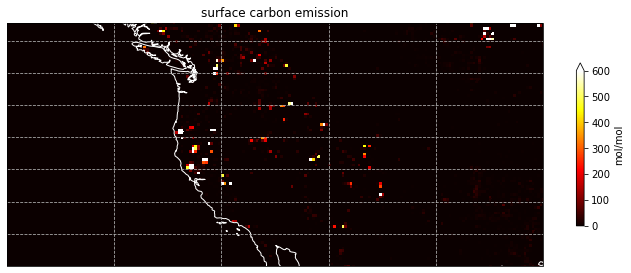

In [86]:
fig = plt.figure(figsize=[12, 6])
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(color='white')
ax.gridlines(linestyle='--')
ax.set_extent((-140, -90, 30, 50))
dr = C_emission_2018['carbon_emission'].sum(dim='time')
dr.plot(ax=ax, vmin=0, vmax=600, cmap=plt.get_cmap('hot'), cbar_kwargs={'shrink': 0.5, 'label': 'mol/mol'})
ax.set_title('surface carbon emission')

Ozone dataset

In [62]:
o3 = pd.read_csv("openaq_data/o3.csv", parse_dates=['utc', 'local'])

In [63]:
o3.head()

,Unnamed: 0,location,city,country,utc,local,parameter,value,unit,latitude,longitude,attribution
0,1552,Golden - NREL - 2054,Denver-Aurora,US,2018-10-13 20:00:00+00:00,2018-10-13 14:00:00-06:00,o3,0.049,ppm,39.741900,-105.178600,"[{""url"":""http://www.airnow.gov/"",""name"":""US EP..."
1,1553,Welby - 78th Ave. &,Denver-Aurora,US,2018-10-13 20:00:00+00:00,2018-10-13 14:00:00-06:00,o3,0.042,ppm,39.839200,-104.948900,"[{""url"":""http://www.airnow.gov/"",""name"":""US EP..."
2,1555,Denver - CAMP - 2105,Denver-Aurora,US,2018-10-13 20:00:00+00:00,2018-10-13 14:00:00-06:00,o3,0.043,ppm,39.751099,-104.987198,"[{""url"":""http://www.airnow.gov/"",""name"":""US EP..."
3,1556,Chatfield Park - 115,Denver-Aurora,US,2018-10-13 20:00:00+00:00,2018-10-13 14:00:00-06:00,o3,0.048,ppm,39.533900,-105.070000,"[{""url"":""http://www.airnow.gov/"",""name"":""US EP..."
4,1560,Highland Reservoir -,Denver-Aurora,US,2018-10-13 20:00:00+00:00,2018-10-13 14:00:00-06:00,o3,0.047,ppm,39.568900,-104.957200,"[{""url"":""http://www.airnow.gov/"",""name"":""US EP..."


Sample interpolation

In [72]:
example_row = o3.iloc[0]
example_row.utc.date()

datetime.date(2018, 10, 13)

In [88]:
dr_C = C_emission_2018['carbon_emission']
dr_C.interp(lat=example_row.latitude, lon=example_row.longitude)

<xarray.DataArray 'carbon_emission' (time: 365)>
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-12-31
    lat      float64 39.74
    lon      float64 -105.2